En este ejercicio, se emplea Keras para implementar una Red Neuronal Convolucional (CNN) con el objetivo de reconocer prendas de vestir en el conjunto de datos Fashion MNIST.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [15]:
# Cargar el conjunto de datos Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Etiquetas correspondientes a las clases en Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Mostrar información sobre los datos cargados
print("Dimensiones de datos de entrenamiento:", train_images.shape)
print("Cantidad de etiquetas de entrenamiento:", len(train_labels))
print("Dimensiones de datos de prueba:", test_images.shape)
print("Cantidad de etiquetas de prueba:", len(test_labels))


Dimensiones de datos de entrenamiento: (60000, 28, 28)
Cantidad de etiquetas de entrenamiento: 60000
Dimensiones de datos de prueba: (10000, 28, 28)
Cantidad de etiquetas de prueba: 10000


In [16]:
# Normalizar los valores de píxeles de las imágenes al rango [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


In [17]:
#Construcción del Modelo CNN

# Definir el modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Mostrar un resumen del modelo
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [20]:
#Visualización de las Capas Convolucionales

# Crear un nuevo modelo para visualizar las capas convolucionales
convolutional_layers_model = Model(inputs=model.inputs, outputs=model.layers[0].output)

# Seleccionar una imagen de prueba para visualización
sample_image = test_images[0]
sample_image = np.expand_dims(sample_image, axis=0)  # Agregar dimensión del lote (batch)

# Obtener las salidas de las capas convolucionales para la imagen de prueba
conv_output = convolutional_layers_model.predict(sample_image)


1/1 [==============================] - 0s 44ms/step


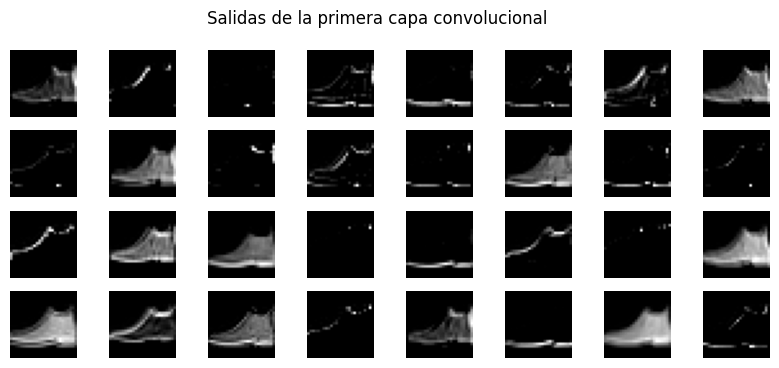

In [21]:

# Mostrar las salidas de las primeras dos capas convolucionales
plt.figure(figsize=(10, 4))
for i in range(32):  # Mostrar 32 filtros de la primera capa convolucional
    plt.subplot(4, 8, i+1)
    plt.imshow(conv_output[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.suptitle('Salidas de la primera capa convolucional')
plt.show()

In [22]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [26]:
# Entrenar el modelo
history = model.fit(train_images.reshape(-1, 28, 28, 1), train_labels, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 52s 34ms/step - loss: 0.4620 - accuracy: 0.8332 - val_loss: 0.3375 - val_accuracy: 0.8798
Epoch 2/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.3094 - accuracy: 0.8873 - val_loss: 0.2843 - val_accuracy: 0.8984
Epoch 3/10
1500/1500 [==============================] - 52s 34ms/step - loss: 0.2617 - accuracy: 0.9037 - val_loss: 0.2804 - val_accuracy: 0.8992
Epoch 4/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.2288 - accuracy: 0.9151 - val_loss: 0.2764 - val_accuracy: 0.8994
Epoch 5/10
1500/1500 [==============================] - 54s 36ms/step - loss: 0.2026 - accuracy: 0.9246 - val_loss: 0.2496 - val_accuracy: 0.9112
Epoch 6/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.1795 - accuracy: 0.9329 - val_loss: 0.2587 - val_accuracy: 0.9093
Epoch 7/10
1500/1500 [==============================] - 52s 35ms/step - loss: 0.1566 - accuracy: 0.9415 - val_loss: 0.2565 -

In [27]:
# Evaluar el modelo en el conjunto de entrenamiento y prueba
train_loss, train_accuracy = model.evaluate(train_images.reshape(-1, 28, 28, 1), train_labels, verbose=2)
test_loss, test_accuracy = model.evaluate(test_images.reshape(-1, 28, 28, 1), test_labels, verbose=2)

print(f'Pérdida en conjunto de entrenamiento: {train_loss:.4f}')
print(f'Precisión en conjunto de entrenamiento: {train_accuracy:.4f}')
print(f'Pérdida en conjunto de prueba: {test_loss:.4f}')
print(f'Precisión en conjunto de prueba: {test_accuracy:.4f}')


1875/1875 - 18s - loss: 0.1241 - accuracy: 0.9589 - 18s/epoch - 10ms/step
313/313 - 3s - loss: 0.2940 - accuracy: 0.9089 - 3s/epoch - 9ms/step
Pérdida en conjunto de entrenamiento: 0.1241
Precisión en conjunto de entrenamiento: 0.9589
Pérdida en conjunto de prueba: 0.2940
Precisión en conjunto de prueba: 0.9089


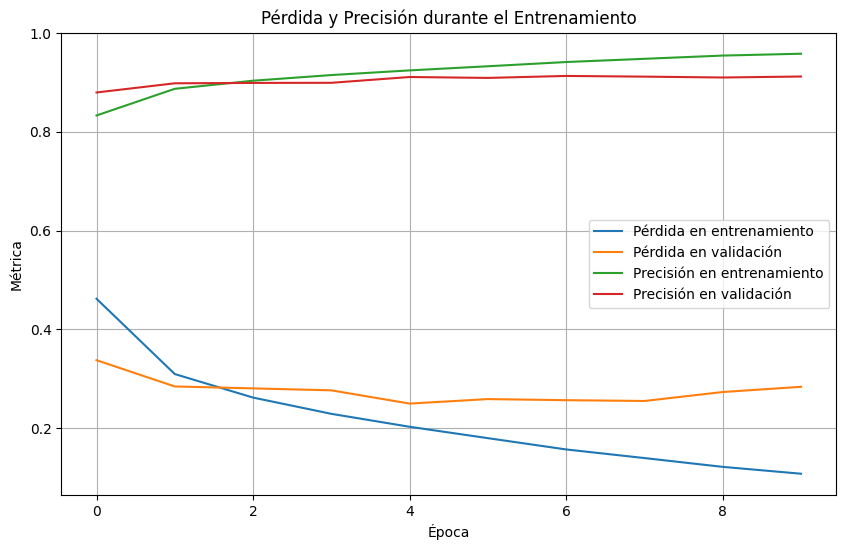

In [28]:
# Historial de entrenamiento
history_df = pd.DataFrame(history.history)

# Graficar la pérdida y la precisión durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(history_df['loss'], label='Pérdida en entrenamiento')
plt.plot(history_df['val_loss'], label='Pérdida en validación')
plt.plot(history_df['accuracy'], label='Precisión en entrenamiento')
plt.plot(history_df['val_accuracy'], label='Precisión en validación')
plt.xlabel('Época')
plt.ylabel('Métrica')
plt.title('Pérdida y Precisión durante el Entrenamiento')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
# Seleccionar una imagen de prueba específica
sample_image_idx = 0
sample_image = test_images[sample_image_idx]
sample_label = test_labels[sample_image_idx]

# Realizar la predicción en la imagen de prueba
prediction = model.predict(np.expand_dims(sample_image, axis=0).reshape(1, 28, 28, 1))
predicted_label = np.argmax(prediction)

# Mostrar la etiqueta real y la clasificación prevista
print(f'Etiqueta real: {class_names[sample_label]}')
print(f'Clasificación prevista: {class_names[predicted_label]}')


1/1 [==============================] - 0s 21ms/step
Etiqueta real: Ankle boot
Clasificación prevista: Ankle boot


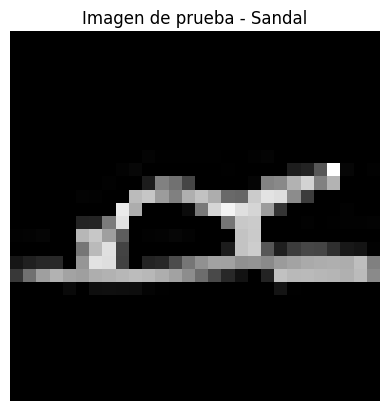

1/1 [==============================] - 0s 23ms/step
Etiqueta real: Sandal
Clasificación prevista: Sandal


In [30]:
import random

# Seleccionar una imagen aleatoria del conjunto de prueba
random_idx = random.randint(0, len(test_images) - 1)
sample_image = test_images[random_idx]
sample_label = test_labels[random_idx]

# Mostrar la imagen seleccionada
plt.imshow(sample_image, cmap='gray')
plt.axis('off')
plt.title(f'Imagen de prueba - {class_names[sample_label]}')
plt.show()

# Realizar la predicción en la imagen de prueba
prediction = model.predict(np.expand_dims(sample_image, axis=0).reshape(1, 28, 28, 1))
predicted_label = np.argmax(prediction)

# Mostrar la etiqueta real y la clasificación prevista
print(f'Etiqueta real: {class_names[sample_label]}')
print(f'Clasificación prevista: {class_names[predicted_label]}')
